In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariant Analysis

In [120]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


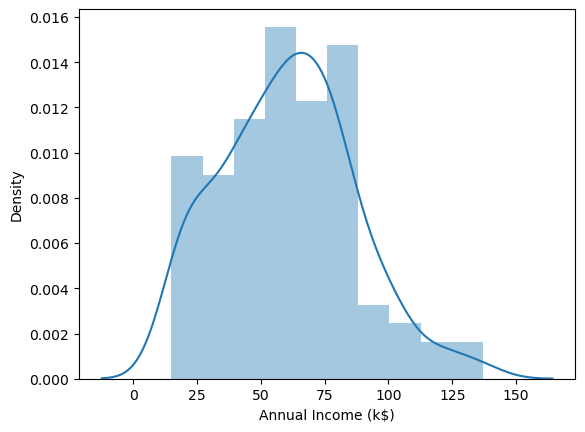

In [121]:
sns.distplot(df['Annual Income (k$)']);

In [122]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

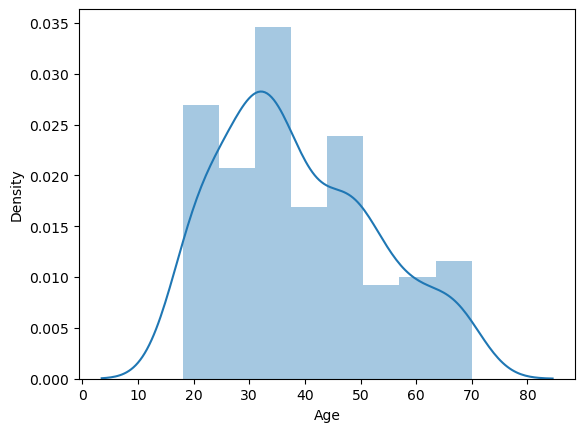

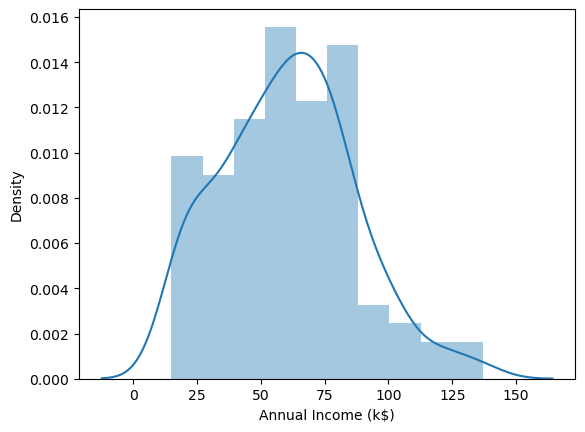

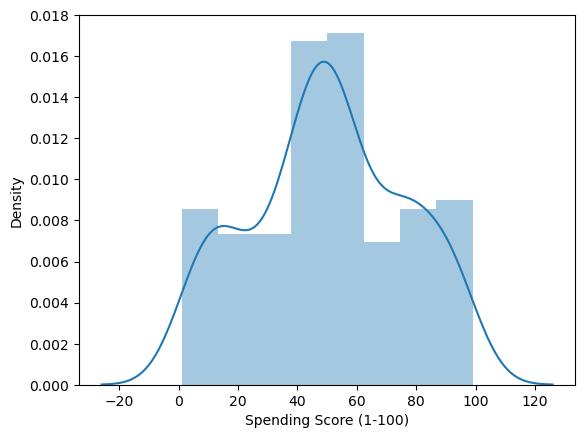

In [123]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [124]:
print(df['Gender'].dtype)


object


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

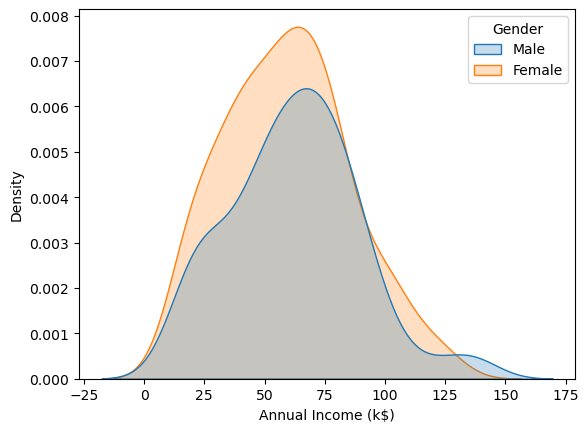

In [125]:
sns.kdeplot(x='Annual Income (k$)', data=df, shade=True, hue='Gender')


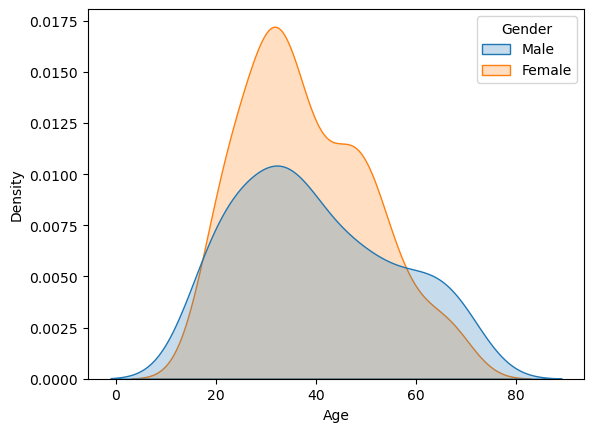

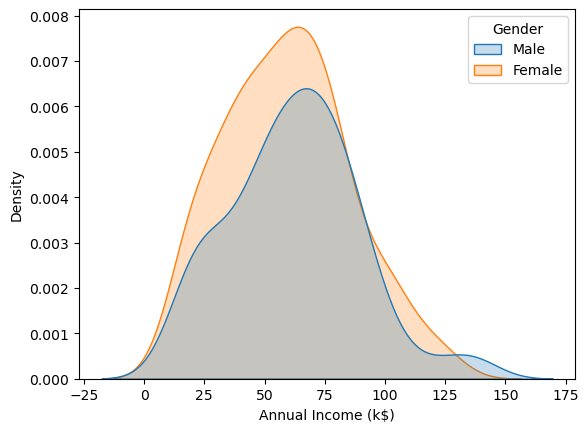

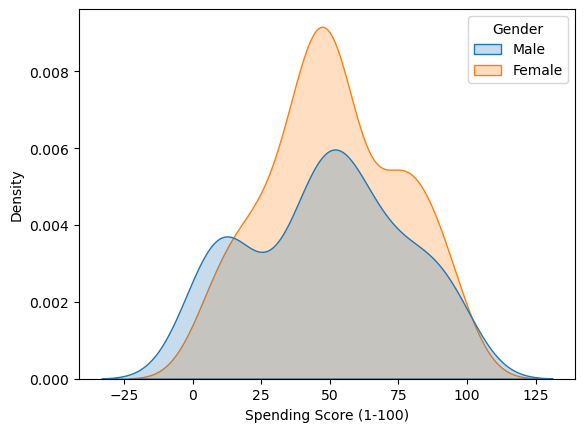

In [126]:
column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.kdeplot(x=i, data=df, shade=True, hue='Gender')


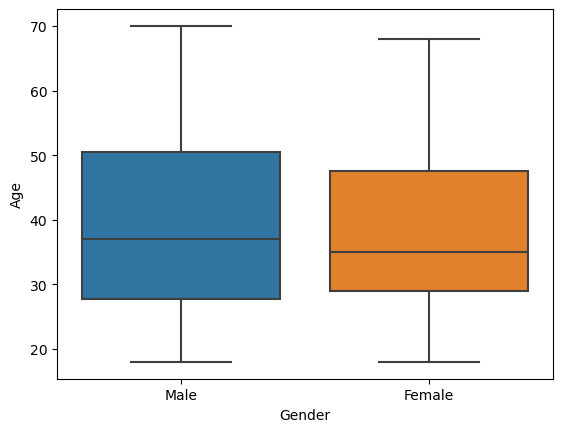

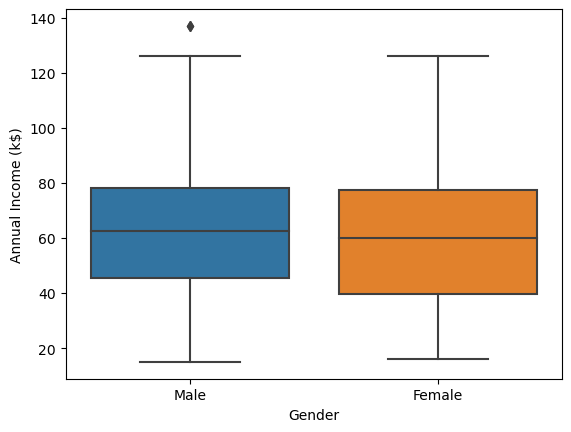

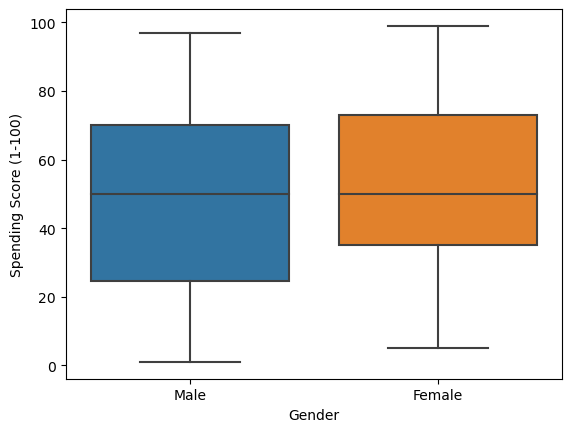

In [127]:
columns= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i)


# Bivariant Analysis

In [128]:
df = df.drop(['CustomerID'], axis=1)

In [129]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


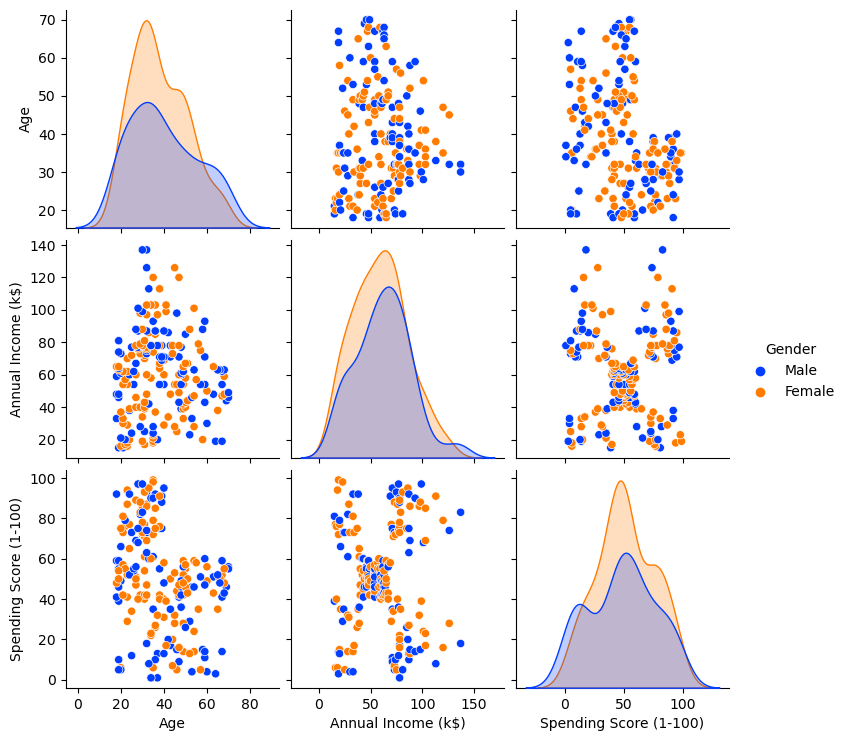

In [130]:
sns.pairplot(data=df,hue='Gender',palette='bright',diag_kind='kde',kind='scatter')

In [131]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [132]:
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

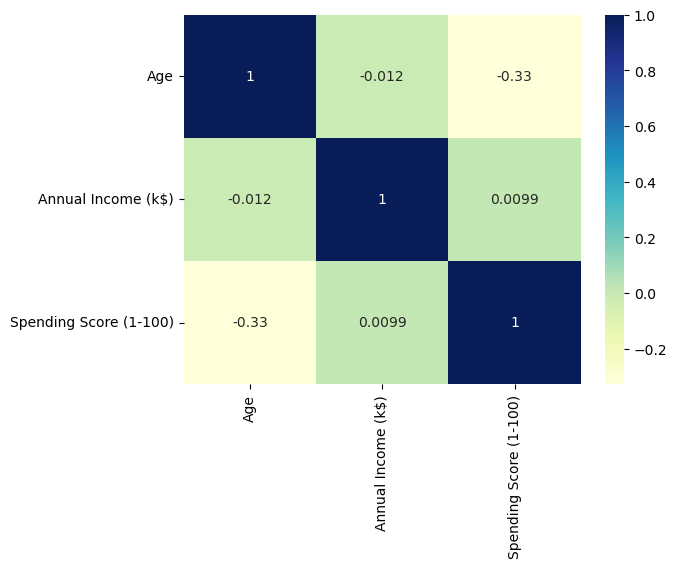

In [133]:
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

# Clustering - Univariate, Bivariate, Multivariate

Univariate

Inertia is the sum of squared distances of samples to their closest cluster center. It measures how internally coherent the clusters are.

In [134]:
from sklearn.cluster import KMeans

In [135]:
intertia_scores=[]
for i in range(1,11):
    km= KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)']])
    intertia_scores.append(km.inertia_)

In [136]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8493.229304029304,
 5050.904761904763,
 3976.358363858364,
 2822.4996947496943,
 2168.4787157287155,
 1739.5591575091576]

This code is commonly used as part of the elbow method to determine the optimal number of clusters. 

It calculates the inertia scores for different numbers of clusters using the KMeans algorithm

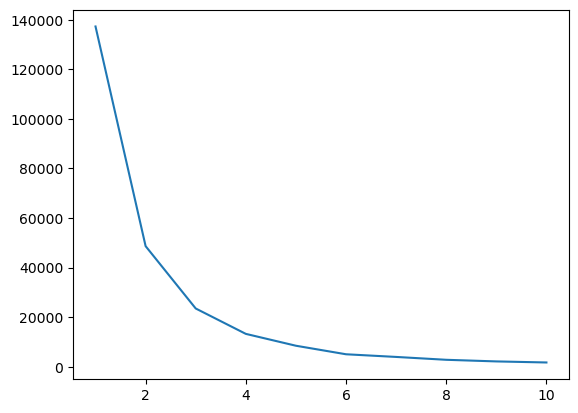

In [137]:
plt.plot(range(1,11),intertia_scores)

In [138]:
clustering1 = KMeans(n_clusters=3)

In [139]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [140]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [141]:
df['income_cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [142]:
df['income_cluster'].value_counts()

income_cluster
2    92
0    72
1    36
Name: count, dtype: int64

In [143]:
clustering1.inertia_

23528.152173913055

In [144]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income_cluster'],
      dtype='object')

In [145]:
df.groupby('income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


# Bivariate Clustering

In [146]:
intertia_scores2 =[]
for i in range(1,11):
    km2=KMeans(n_clusters=i)
    km2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(km2.inertia_)

In [147]:
intertia_scores2

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 26095.89575516193,
 22816.679142051555,
 19787.670554966855]

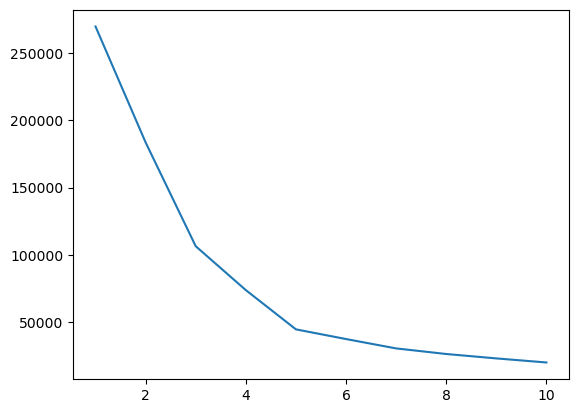

In [148]:
plt.plot(range(1,11),intertia_scores2)

In [149]:
clustering2=KMeans(n_clusters=5)

In [150]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [151]:
df['Income & Spending Cluster']= clustering2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster,Income & Spending Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,1
2,Female,20,16,6,0,3
3,Female,23,16,77,0,1
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,2
197,Male,32,126,74,1,0
198,Male,32,137,18,1,2


In [152]:
df['Income & Spending Cluster'].value_counts()

Income & Spending Cluster
4    81
0    39
2    35
3    23
1    22
Name: count, dtype: int64

In [153]:
centre = pd.DataFrame(clustering2.cluster_centers_,columns=['x','y'])
centre

,x,y
0,86.538462,82.128205
1,25.727273,79.363636
2,88.200000,17.114286
3,26.304348,20.913043
4,55.296296,49.518519


<Axes: xlabel='x', ylabel='y'>

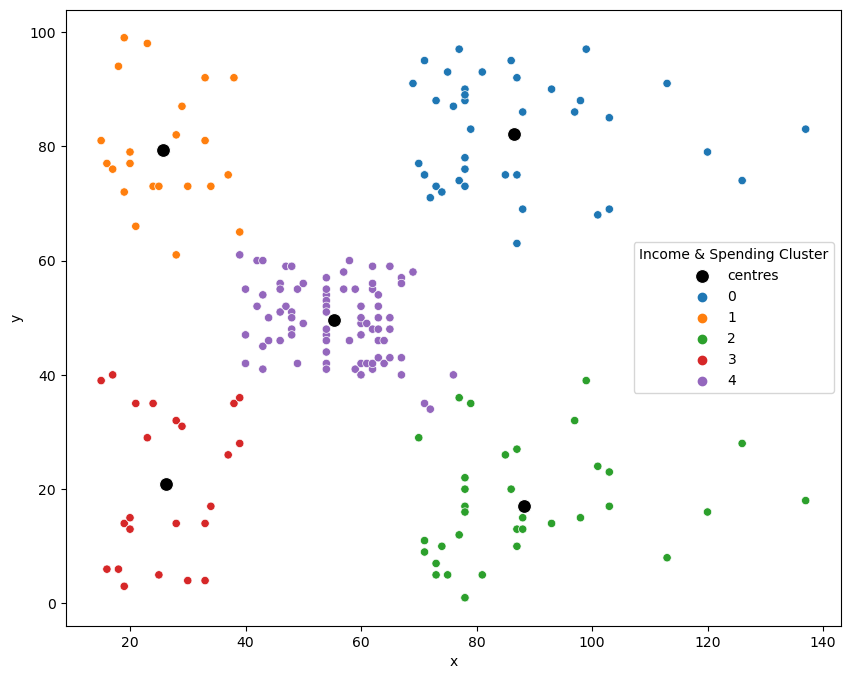

In [154]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=centre,x='x',y='y',s=100, markers='*',c='black',label='centres')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income & Spending Cluster',palette= 'tab10')

In [155]:
pd.crosstab(df['Income & Spending Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Income & Spending Cluster,,
0,0.538462,0.461538
1,0.590909,0.409091
2,0.457143,0.542857
3,0.608696,0.391304
4,0.592593,0.407407


In [156]:
df.groupby('Income & Spending Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()



,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Cluster,,,
0,32.692308,86.538462,82.128205
1,25.272727,25.727273,79.363636
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


# Mulivariate clustering 

In [157]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster,Income & Spending Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,1
2,Female,20,16,6,0,3
3,Female,23,16,77,0,1
4,Female,31,17,40,0,3


In [161]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster,Income & Spending Cluster
0,1,19,15,39,0,3
1,1,21,15,81,0,1
2,0,20,16,6,0,3
3,0,23,16,77,0,1
4,0,31,17,40,0,3
...,...,...,...,...,...,...
195,0,35,120,79,1,0
196,0,45,126,28,1,2
197,1,32,126,74,1,0
198,1,32,137,18,1,2


In [159]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income_cluster', 'Income & Spending Cluster'],
      dtype='object')

In [162]:
dff=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dff

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [170]:
from sklearn.preprocessing  import StandardScaler

scaler=StandardScaler()

d_scaler=scaler.fit_transform(dff)
d_scaler

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [171]:
dff = pd.DataFrame(d_scaler,columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
dff

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


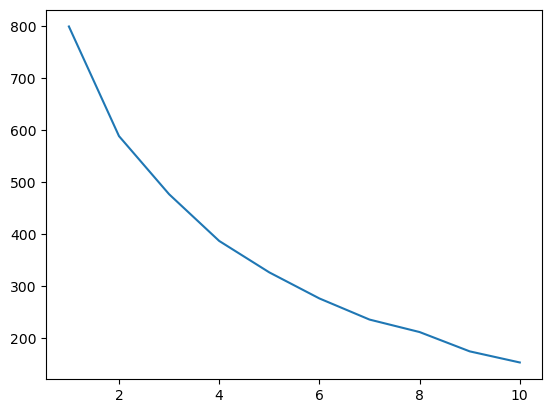

In [172]:
intertia_scores3=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(dff)
    intertia_scores3.append(km.inertia_)


plt.plot(range(1,11),intertia_scores3)

In [173]:
clustering3=KMeans(n_clusters=4)
clustering3.fit(dff)


KMeans(n_clusters=4)

In [174]:
clustering3.inertia_

386.8284255837667

In [175]:
clustering3.labels_

array([2, 2, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 1, 2, 3, 0, 3, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 3, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 3, 1, 3, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2,
       1, 1, 2, 0, 3, 1, 1, 1, 3, 2, 1, 3, 0, 1, 3, 2, 3, 1, 0, 3, 1, 0,
       0, 1, 1, 2, 3, 1, 0, 2, 1, 0, 3, 2, 0, 1, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 3, 0, 1, 2, 3, 0, 1, 2, 0, 0, 3, 2, 3, 0, 1, 2, 3, 2, 1, 0,
       1, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3, 2, 3, 2, 1, 0,
       3, 2, 3, 2, 1, 0, 3, 0, 1, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 0, 1, 2,
       3, 2])

In [176]:
df['all_cluster']=clustering3.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster,Income & Spending Cluster,all_cluster
0,1,19,15,39,0,3,2
1,1,21,15,81,0,1,2
2,0,20,16,6,0,3,1
3,0,23,16,77,0,1,0
4,0,31,17,40,0,3,1
...,...,...,...,...,...,...,...
195,0,35,120,79,1,0,0
196,0,45,126,28,1,2,1
197,1,32,126,74,1,0,2
198,1,32,137,18,1,2,3


In [177]:
df['all_cluster'].value_counts()

all_cluster
1    56
0    56
3    48
2    40
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10,8))
#sns.scatterplot(data=centre,x='x',y='y',s=100, markers='*',c='black',label='centres')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income & Spending Cluster',palette= 'tab10')